<div style="display: flex; background-color: RGB(255,114,0);" >
<h1 style="margin: auto; padding: 30px; ">Produisez une étude de marché avec R ou Python</h1>
</div>

# Importation des librairies

In [3]:
import os
os.environ["OMP_NUM_THREADS"] = "1"
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import plotly.express as px

from sklearn.cluster import KMeans
from pandas.plotting import parallel_coordinates
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score


# Étape 1 : Charger les données

In [5]:
# Afficher le datafram
df = pd.read_csv("resultat.csv", decimal=".", index_col=0)
df.head()

Disponibilité intérieure  Exportations - Quantité  \
Pays                                                                
Afghanistan                         57.0                      0.0   
Afrique du Sud                    2118.0                     63.0   
Albanie                             47.0                      0.0   
Algérie                            277.0                      0.0   
Allemagne                         1739.0                    646.0   

                Importations - Quantité  Nourriture  Production  \
Pays                                                              
Afghanistan                        29.0        55.0        28.0   
Afrique du Sud                    514.0      2035.0      1667.0   
Albanie                            38.0        47.0        13.0   
Algérie                             2.0       264.0       275.0   
Allemagne                         842.0      1609.0      1514.0   

                Population_2017      PIB_2017  Stability_2017  Distance  \
Pays                                                                      
Afghanistan          36296113.0    526.140801       -2.794976   5528.23   
Afrique du Sud       57009756.0   6734.475153       -0.284804   9031.17   
Albanie               2884169.0   4531.032207        0.373771   1638.89   
Algérie              41389189.0   4615.868744       -0.919614   2312.25   
Allemagne            82658409.0  44652.589172        0.574381    634.38   

                Nombre de restaurant  
Pays                                  
Afghanistan                      0.0  
Afrique du Sud                 955.0  
Albanie                          8.0  
Algérie                          1.0  
Allemagne                      191.0

In [6]:
# inoformations
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 153 entries, Afghanistan to Îles Salomon
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Disponibilité intérieure  153 non-null    float64
 1   Exportations - Quantité   153 non-null    float64
 2   Importations - Quantité   153 non-null    float64
 3   Nourriture                153 non-null    float64
 4   Production                153 non-null    float64
 5   Population_2017           153 non-null    float64
 6   PIB_2017                  153 non-null    float64
 7   Stability_2017            153 non-null    float64
 8   Distance                  153 non-null    float64
 9   Nombre de restaurant      153 non-null    float64
dtypes: float64(10)
memory usage: 13.1+ KB


In [7]:
# Lignes en double ?
df.duplicated().sum()

0

In [8]:
# Nombre de valeurs différentes par colonne ?
df.nunique()

Disponibilité intérieure    120
Exportations - Quantité      44
Importations - Quantité      76
Nourriture                  114
Production                  109
Population_2017             153
PIB_2017                    153
Stability_2017              152
Distance                     87
Nombre de restaurant         51
dtype: int64

In [9]:
# La dispertion globale de nos données :
df.describe()

Disponibilité intérieure  Exportations - Quantité  \
count                153.000000               153.000000   
mean                 463.000000                81.254902   
std                 1084.956651               382.048573   
min                    0.000000                 0.000000   
25%                   26.000000                 0.000000   
50%                   82.000000                 0.000000   
75%                  325.000000                10.000000   
max                 9982.000000              4223.000000   

       Importations - Quantité   Nourriture    Production  Population_2017  \
count               153.000000   153.000000    153.000000     1.530000e+02   
mean                 79.032680   434.921569    479.137255     3.343897e+07   
std                 173.086927  1052.006532   1343.366338     1.146159e+08   
min                   0.000000     0.000000      0.000000     5.204500e+04   
25%                   3.000000    22.000000     10.000000     2.205080e+06   
50%                  14.000000    75.000000     61.000000     9.429013e+06   
75%                  64.000000   315.000000    249.000000     2.864902e+07   
max                1069.000000  9982.000000  14201.000000     1.338677e+09   

            PIB_2017  Stability_2017      Distance  Nombre de restaurant  
count     153.000000      153.000000    153.000000            153.000000  
mean    13479.497916       -0.057584   6053.125621             52.411765  
std     18665.319824        0.869149   4015.974161            161.564576  
min       414.740322       -2.794976      0.000000              0.000000  
25%      1941.879479       -0.629498   2700.000000              0.000000  
50%      6112.883014        0.000000   5400.000000              2.000000  
75%     16258.748929        0.628550   8700.000000             21.000000  
max    110193.213797        1.561946  19000.000000           1131.000000

# Étape 2 : Nettoyage des données

In [11]:
# Vérifier les valeurs manquantes
print("Données manquantes :\n", df.isnull().sum())

Données manquantes :
 Disponibilité intérieure    0
Exportations - Quantité     0
Importations - Quantité     0
Nourriture                  0
Production                  0
Population_2017             0
PIB_2017                    0
Stability_2017              0
Distance                    0
Nombre de restaurant        0
dtype: int64


In [12]:
# Supprimer ou imputer les valeurs manquantes
data = df.dropna()

In [13]:
# Sélectionner uniquement les colonnes numériques pour l'ACP
features = ['Disponibilité intérieure', 'Exportations - Quantité', 'Importations - Quantité', 
            'Nourriture', 'Production', 'Population_2017', 'PIB_2017', 'Stability_2017', 
            'Distance', 'Nombre de restaurant']
X = data[features]

In [14]:
# Ajoistement de données
scaler = StandardScaler(with_std=True)
scaler

StandardScaler()

In [15]:
# On fit :
scaler.fit(X)

StandardScaler()

In [16]:
# Rappelons qu'on peut faire les 2 opérations en une seule :
X_scaled = scaler.fit_transform(X)

In [17]:
# On espère avoir une moyenne à 0 et un écart type à 1 :
idx = ["mean", "std"]

pd.DataFrame(X_scaled).describe().round(2).loc[idx, :]

0    1    2    3    4    5    6    7    8    9
mean -0.0  0.0 -0.0 -0.0  0.0  0.0  0.0 -0.0  0.0 -0.0
std   1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0

In [18]:
#  Détection des outliers

from sklearn.ensemble import IsolationForest
iso = IsolationForest(contamination=0.02, random_state=42)
outlier_labels = iso.fit_predict(X_scaled)
data['Outlier'] = outlier_labels
outliers = data[data['Outlier'] == -1]
print("Outliers détectés :\n")
outliers


Outliers détectés :



Disponibilité intérieure  Exportations - Quantité  \
Pays                                                         
Brésil                     9982.0                   4223.0   
Inde                       3661.0                      4.0   
Japon                      2415.0                     10.0   
Mexique                    4219.0                      9.0   

         Importations - Quantité  Nourriture  Production  Population_2017  \
Pays                                                                        
Brésil                       3.0      9982.0     14201.0     2.078338e+08   
Inde                         0.0      2965.0      3545.0     1.338677e+09   
Japon                     1069.0      2359.0      2215.0     1.275027e+08   
Mexique                    972.0      4058.0      3249.0     1.247773e+08   

             PIB_2017  Stability_2017  Distance  Nombre de restaurant  Outlier  
Pays                                                                            
Brésil    9896.718895       -0.479948    9400.0                  60.0       -1  
Inde      1957.969813       -0.774099    7200.0                 395.0       -1  
Japon    38834.052934        1.100128    9700.0                1131.0       -1  
Mexique   9693.330091       -0.806420    9200.0                 393.0       -1

In [19]:
# Supprimer les outliers
data = data[data['Outlier'] == 1]
X_scaled = X_scaled[outlier_labels == 1]

In [20]:
# Affichage du datafram transformé
df_transforme = pd.DataFrame(data)

# Standardisation
scaler = StandardScaler()
df_transforme_scaled = pd.DataFrame(scaler.fit_transform(df_transforme), columns=df_transforme.columns)

df_transforme_scaled

Disponibilité intérieure  Exportations - Quantité  \
0                   -0.452971                -0.302568   
1                    2.853561                 0.044391   
2                   -0.469015                -0.302568   
3                   -0.100018                -0.302568   
4                    2.245518                 3.255141   
..                        ...                      ...   
144                 -0.422489                -0.302568   
145                  0.116567                 0.215117   
146                  0.002660                -0.302568   
147                 -0.521958                -0.302568   
148                 -0.539605                -0.302568   

     Importations - Quantité  Nourriture  Production  Population_2017  \
0                  -0.283217   -0.443913   -0.474445         0.359548   
1                   3.290497    2.915495    2.048410         0.890307   
2                  -0.216900   -0.457486   -0.497534        -0.496588   
3                  -0.482166   -0.089309   -0.094246         0.490051   
4                   5.707360    2.192713    1.812903         1.547519   
..                       ...         ...         ...              ...   
144                -0.452692   -0.423553   -0.411335        -0.205697   
145                 2.693650    0.161799   -0.443659        -0.327394   
146                -0.496903    0.012492    0.005806        -0.140389   
147                -0.489534   -0.513476   -0.495994         2.155863   
148                -0.452692   -0.532140   -0.517544        -0.554193   

     PIB_2017  Stability_2017  Distance  Nombre de restaurant  Outlier  
0   -0.690048       -3.159781 -0.111565             -0.309873      0.0  
1   -0.358208       -0.267457  0.758551              6.990351      0.0  
2   -0.475984        0.491380 -1.077661             -0.248719      0.0  
3   -0.471449       -0.998912 -0.910401             -0.302229      0.0  
4    1.668545        0.722532 -1.327177              1.150172      0.0  
..        ...             ...       ...                   ...      ...  
144 -0.654452       -0.757882  0.452734             -0.264008      0.0  
145  1.583632        0.754297 -0.193096              0.874980      0.0  
146 -0.383746       -0.030243  0.899847             -0.309873      0.0  
147 -0.677775       -1.871869 -0.143417             -0.309873      0.0  
148 -0.596112        0.277429  2.241185             -0.309873      0.0  

[149 rows x 11 columns]

# Étape 3 : ACP (Analyse en Composantes Principales)

In [22]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

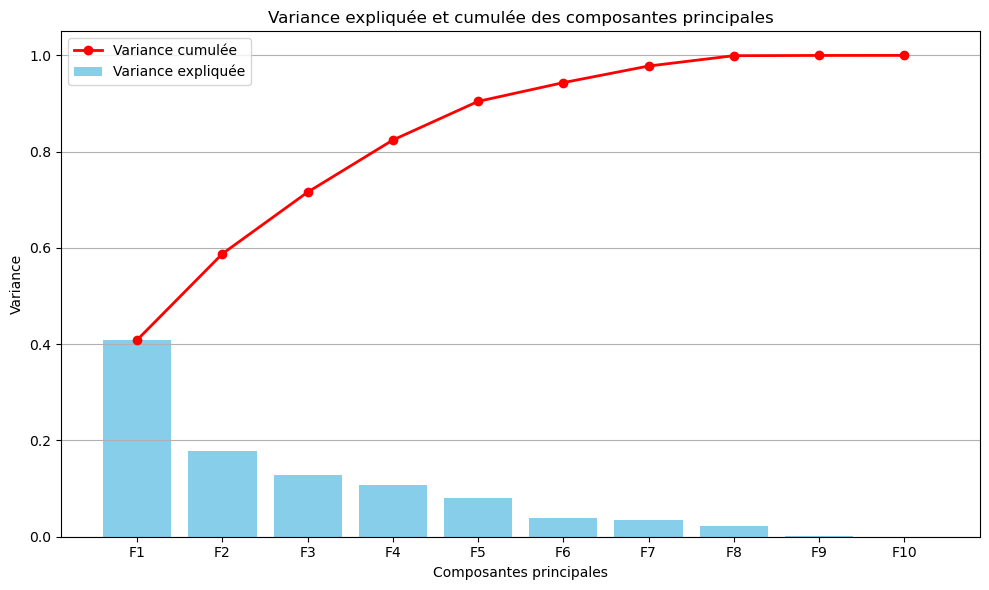

In [23]:
# Suppression des colonnes non nécessaires (si applicable)
df_clean = df.drop(columns=['Pays'], errors='ignore')  # Remplacez 'Pays' par le nom de la colonne si nécessaire

# Normalisation des données
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_clean)

# Appliquer l'ACP
n_components = 10  # Remplacez par le nombre de composantes souhaité
pca = PCA(n_components)
pca.fit(df_scaled)

# Générer les noms des composantes principales en utilisant une boucle
x_list = [f'F{i+1}' for i in range(n_components)]

# Pourcentage d'inertie (variance expliquée par chaque composante)
explained_variance = pca.explained_variance_ratio_

# Calcul de la variance cumulée
cumulative_variance = explained_variance.cumsum()

# Tracer le graphique avec barres pour la variance expliquée et une ligne pour la variance cumulée
plt.figure(figsize=(10, 6))

# Tracer la variance expliquée sous forme de barres
plt.bar(x_list, explained_variance, color='skyblue', label='Variance expliquée')

# Tracer la variance cumulée sous forme de ligne
plt.plot(x_list, cumulative_variance, marker='o', color='red', label='Variance cumulée', linewidth=2)

# Ajouter des labels et un titre
plt.title('Variance expliquée et cumulée des composantes principales')
plt.xlabel('Composantes principales')
plt.ylabel('Variance')
plt.grid(True, axis='y')

# Ajouter une légende
plt.legend()

plt.tight_layout()
plt.show()


In [24]:
# la variance captée par chaque nouvelle composante
pca.explained_variance_ratio_

array([4.09103297e-01, 1.78889238e-01, 1.27937224e-01, 1.08270334e-01,
       8.02963740e-02, 3.89251932e-02, 3.44742074e-02, 2.14898206e-02,
       5.04240730e-04, 1.10071234e-04])

In [25]:
# Enregistrons cela dans une variable :
scree = (pca.explained_variance_ratio_*100).round(1)
scree

array([40.9, 17.9, 12.8, 10.8,  8. ,  3.9,  3.4,  2.1,  0.1,  0. ])

In [26]:
# La somme cumulée
scree_cum = scree.cumsum().round(1)
scree_cum

array([40.9, 58.8, 71.6, 82.4, 90.4, 94.3, 97.7, 99.8, 99.9, 99.9])

# Étape 4 : Graphique des composantes principales

In [28]:
pcs = pca.components_
pcs

array([[ 4.84262343e-01,  3.76970673e-01,  2.06078423e-01,
         4.83356108e-01,  4.77278041e-01,  2.43653254e-01,
         3.49268425e-02, -5.63546095e-02,  3.33708505e-02,
         2.33690123e-01],
       [-4.95887742e-02,  7.00465430e-04,  3.66016789e-01,
        -4.32019174e-02, -7.25590271e-02, -1.89740336e-01,
         6.31563740e-01,  5.52276990e-01, -1.94236737e-01,
         2.80765060e-01],
       [-2.84394663e-02, -4.51492725e-01,  3.98414079e-01,
        -5.70977116e-02, -1.85587236e-01,  2.82736676e-01,
        -1.94066905e-01, -1.49304992e-01,  3.47441650e-01,
         5.81635019e-01],
       [ 2.75708342e-02,  8.41247934e-02, -2.91381370e-01,
         2.76630633e-02,  8.35696220e-02, -1.54710900e-01,
        -2.77817018e-02,  4.71366869e-01,  8.07846909e-01,
        -1.04445976e-05],
       [ 1.45446635e-03, -1.83073930e-01, -4.24183936e-01,
        -4.26023233e-02, -9.42234781e-03,  8.03299518e-01,
         2.92351790e-01,  2.09429962e-01, -8.98561251e-02,
        -4.

In [29]:
# Les composantes
pcs = pd.DataFrame(pcs)
pcs

0         1         2         3         4         5         6  \
0  0.484262  0.376971  0.206078  0.483356  0.477278  0.243653  0.034927   
1 -0.049589  0.000700  0.366017 -0.043202 -0.072559 -0.189740  0.631564   
2 -0.028439 -0.451493  0.398414 -0.057098 -0.185587  0.282737 -0.194067   
3  0.027571  0.084125 -0.291381  0.027663  0.083570 -0.154711 -0.027782   
4  0.001454 -0.183074 -0.424184 -0.042602 -0.009422  0.803300  0.292352   
5 -0.056288  0.076960 -0.601739 -0.042677  0.080806 -0.256442  0.023704   
6  0.044221 -0.118230 -0.056191  0.047350 -0.002530 -0.116239  0.687851   
7 -0.380119  0.734834  0.153526 -0.372637 -0.116026  0.273981  0.047797   
8 -0.427872  0.103240 -0.056077  0.780881 -0.438145  0.031225 -0.001918   
9 -0.654806 -0.207156  0.089624  0.077219  0.716559  0.012296  0.003832   

          7         8         9  
0 -0.056355  0.033371  0.233690  
1  0.552277 -0.194237  0.280765  
2 -0.149305  0.347442  0.581635  
3  0.471367  0.807847 -0.000010  
4  0.209430 -0.089856 -0.044174  
5 -0.141172 -0.195946  0.704144  
6 -0.601062  0.341279 -0.119427  
7 -0.149018  0.157655  0.123396  
8  0.007199  0.003924  0.018171  
9 -0.003359  0.003922 -0.025898

In [30]:
# Affichage avec les composantes principales:
pcs.columns = df.columns
pcs.index = [f"{i}" for i in x_list]
pcs.round(6)

Disponibilité intérieure  Exportations - Quantité  \
F1                   0.484262                 0.376971   
F2                  -0.049589                 0.000700   
F3                  -0.028439                -0.451493   
F4                   0.027571                 0.084125   
F5                   0.001454                -0.183074   
F6                  -0.056288                 0.076960   
F7                   0.044221                -0.118230   
F8                  -0.380119                 0.734834   
F9                  -0.427872                 0.103240   
F10                 -0.654806                -0.207156   

     Importations - Quantité  Nourriture  Production  Population_2017  \
F1                  0.206078    0.483356    0.477278         0.243653   
F2                  0.366017   -0.043202   -0.072559        -0.189740   
F3                  0.398414   -0.057098   -0.185587         0.282737   
F4                 -0.291381    0.027663    0.083570        -0.154711   
F5                 -0.424184   -0.042602   -0.009422         0.803300   
F6                 -0.601739   -0.042677    0.080806        -0.256442   
F7                 -0.056191    0.047350   -0.002530        -0.116239   
F8                  0.153526   -0.372637   -0.116026         0.273981   
F9                 -0.056077    0.780881   -0.438145         0.031225   
F10                 0.089624    0.077219    0.716559         0.012296   

     PIB_2017  Stability_2017  Distance  Nombre de restaurant  
F1   0.034927       -0.056355  0.033371              0.233690  
F2   0.631564        0.552277 -0.194237              0.280765  
F3  -0.194067       -0.149305  0.347442              0.581635  
F4  -0.027782        0.471367  0.807847             -0.000010  
F5   0.292352        0.209430 -0.089856             -0.044174  
F6   0.023704       -0.141172 -0.195946              0.704144  
F7   0.687851       -0.601062  0.341279             -0.119427  
F8   0.047797       -0.149018  0.157655              0.123396  
F9  -0.001918        0.007199  0.003924              0.018171  
F10  0.003832       -0.003359  0.003922             -0.025898

In [31]:
# Transposition de l'affichage:
pcs.T.round(2)

F1    F2    F3    F4    F5    F6    F7    F8  \
Disponibilité intérieure  0.48 -0.05 -0.03  0.03  0.00 -0.06  0.04 -0.38   
Exportations - Quantité   0.38  0.00 -0.45  0.08 -0.18  0.08 -0.12  0.73   
Importations - Quantité   0.21  0.37  0.40 -0.29 -0.42 -0.60 -0.06  0.15   
Nourriture                0.48 -0.04 -0.06  0.03 -0.04 -0.04  0.05 -0.37   
Production                0.48 -0.07 -0.19  0.08 -0.01  0.08 -0.00 -0.12   
Population_2017           0.24 -0.19  0.28 -0.15  0.80 -0.26 -0.12  0.27   
PIB_2017                  0.03  0.63 -0.19 -0.03  0.29  0.02  0.69  0.05   
Stability_2017           -0.06  0.55 -0.15  0.47  0.21 -0.14 -0.60 -0.15   
Distance                  0.03 -0.19  0.35  0.81 -0.09 -0.20  0.34  0.16   
Nombre de restaurant      0.23  0.28  0.58 -0.00 -0.04  0.70 -0.12  0.12   

                            F9   F10  
Disponibilité intérieure -0.43 -0.65  
Exportations - Quantité   0.10 -0.21  
Importations - Quantité  -0.06  0.09  
Nourriture                0.78  0.08  
Production               -0.44  0.72  
Population_2017           0.03  0.01  
PIB_2017                 -0.00  0.00  
Stability_2017            0.01 -0.00  
Distance                  0.00  0.00  
Nombre de restaurant      0.02 -0.03

<Axes: >

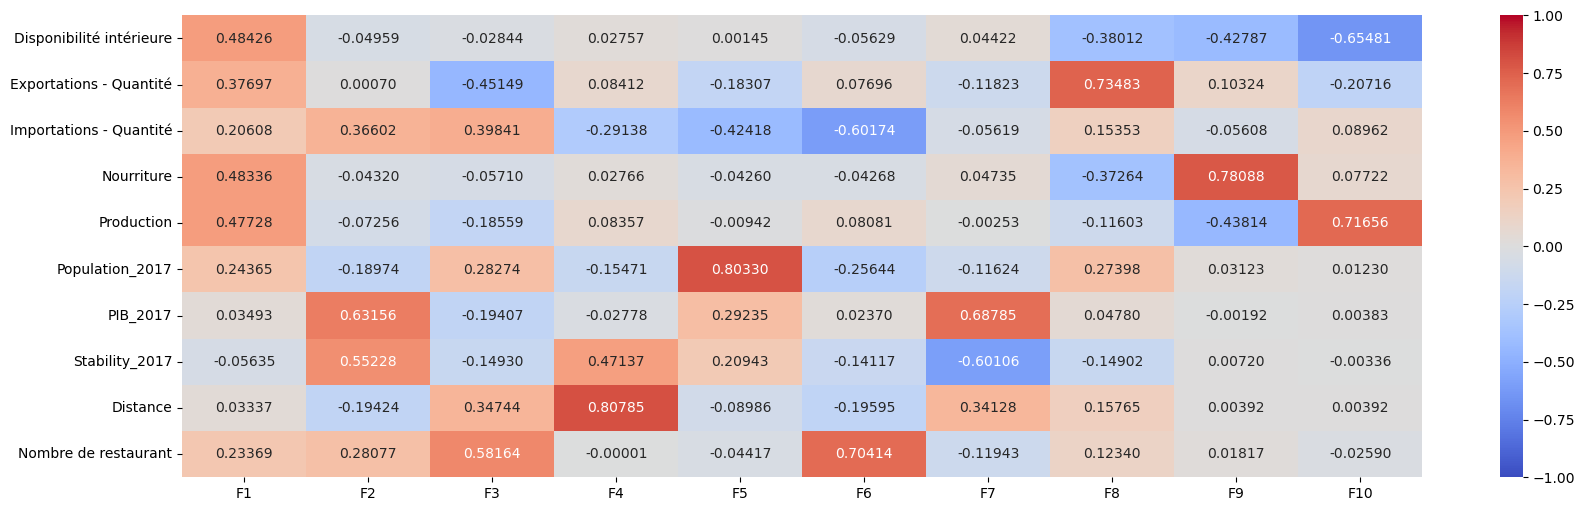

In [32]:
# représentation plus visuelle
# heatmap
fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.5f")

# Étape 5 : La corrélation

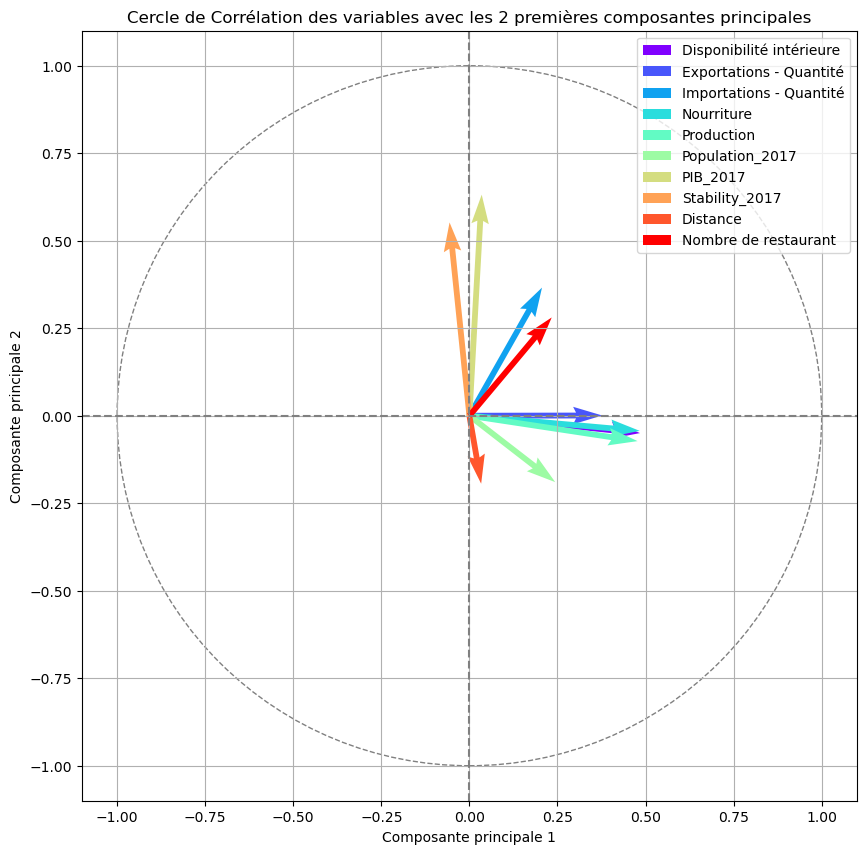

In [34]:
# Calcul des charges (coefficients de corrélation)
pca_components = pca.components_

# Visualisation du cercle de corrélation
plt.figure(figsize=(10, 10))

# Ajout du cercle
circle = plt.Circle((0, 0), 1, color='gray', fill=False, linestyle='--')
plt.gca().add_artist(circle)

# Ajout des vecteurs avec des couleurs
colors = plt.cm.rainbow(np.linspace(0, 1, len(df_clean.columns)))
for i, (column, color) in enumerate(zip(df_clean.columns, colors)):
    plt.quiver(0, 0, pca_components[0, i], pca_components[1, i], angles='xy', scale_units='xy', scale=1, color=color, label=column)

plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.title('Cercle de Corrélation des variables avec les 2 premières composantes principales')
plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


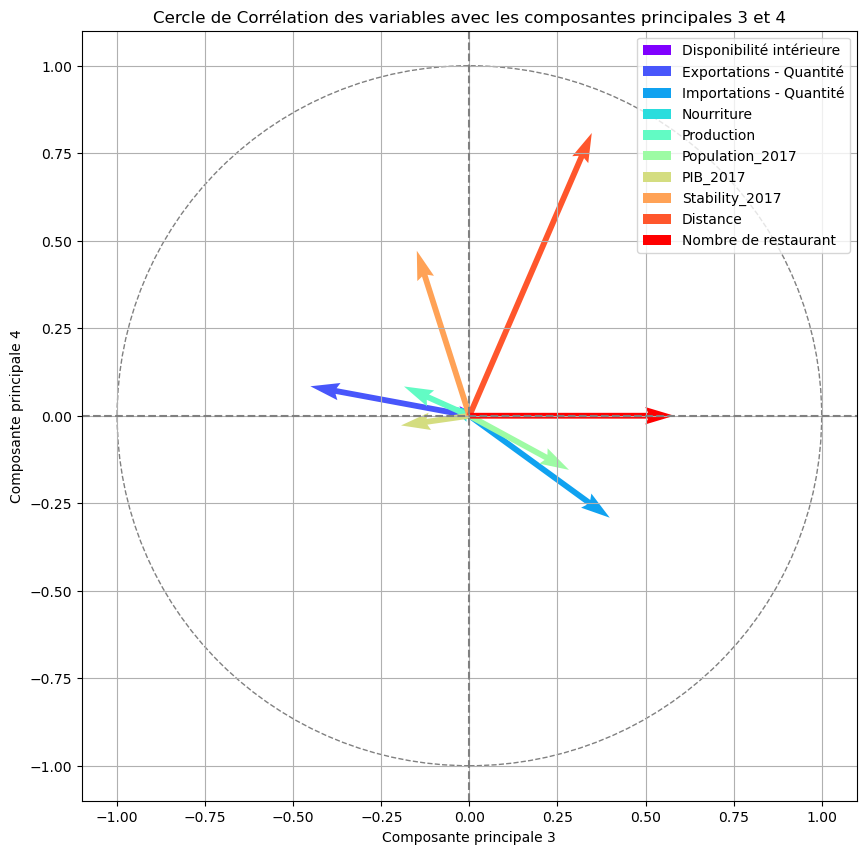

In [35]:
# Calcul des charges (coefficients de corrélation)
pca_components = pca.components_

# Visualisation du cercle de corrélation pour les composantes 3 et 4
plt.figure(figsize=(10, 10))

# Ajout du cercle
circle = plt.Circle((0, 0), 1, color='gray', fill=False, linestyle='--')
plt.gca().add_artist(circle)

# Ajout des vecteurs avec des couleurs
colors = plt.cm.rainbow(np.linspace(0, 1, len(df_clean.columns)))
for i, (column, color) in enumerate(zip(df_clean.columns, colors)):
    plt.quiver(0, 0, pca_components[2, i], pca_components[3, i], angles='xy', scale_units='xy', scale=1, color=color, label=column)

plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.title('Cercle de Corrélation des variables avec les composantes principales 3 et 4')
plt.xlabel('Composante principale 3')
plt.ylabel('Composante principale 4')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

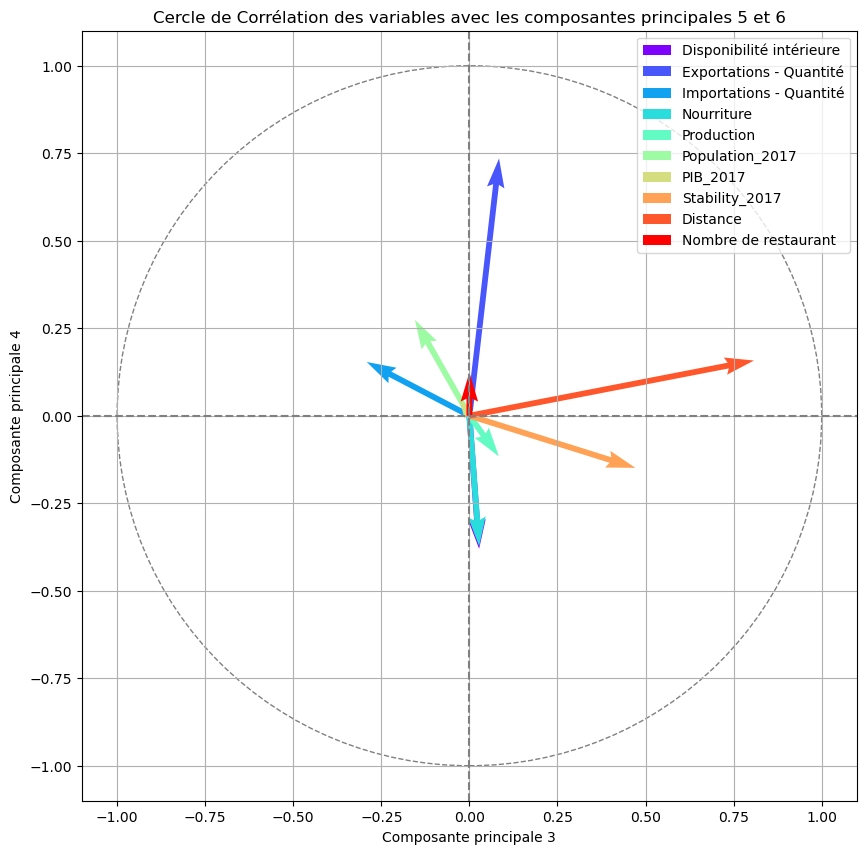

In [36]:
# Calcul des charges (coefficients de corrélation)
pca_components = pca.components_

# Visualisation du cercle de corrélation pour les composantes 5 et 6
plt.figure(figsize=(10, 10))

# Ajout du cercle
circle = plt.Circle((0, 0), 1, color='gray', fill=False, linestyle='--')
plt.gca().add_artist(circle)

# Ajout des vecteurs avec des couleurs
colors = plt.cm.rainbow(np.linspace(0, 1, len(df_clean.columns)))
for i, (column, color) in enumerate(zip(df_clean.columns, colors)):
    plt.quiver(0, 0, pca_components[3, i], pca_components[7, i], angles='xy', scale_units='xy', scale=1, color=color, label=column)

plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.title('Cercle de Corrélation des variables avec les composantes principales 5 et 6')
plt.xlabel('Composante principale 3')
plt.ylabel('Composante principale 4')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

# Étape 6 : La projection

In [38]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

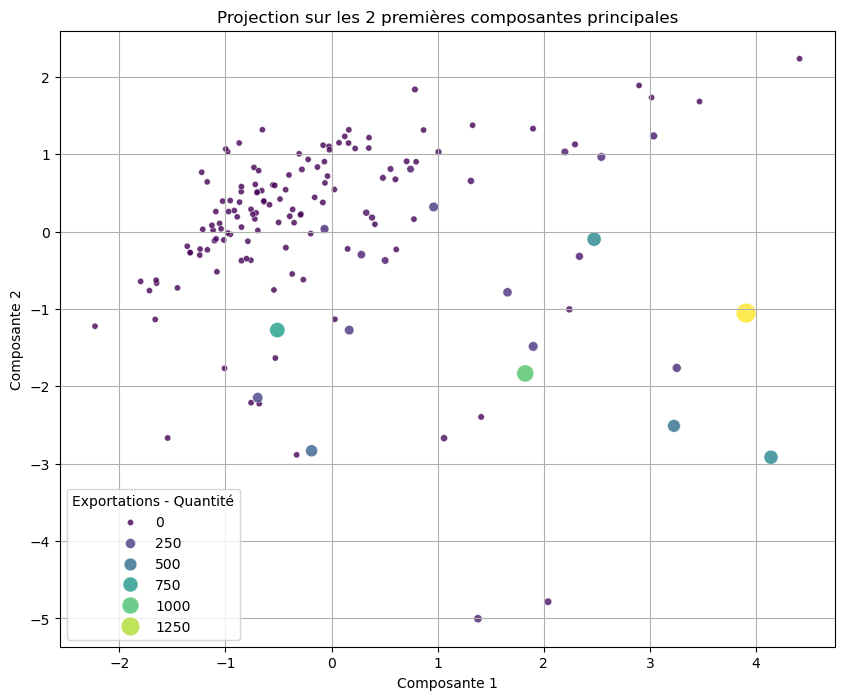

In [39]:
# Graphique des composantes principales
plt.figure(figsize=(10, 8))

# Utilisation d'une palette de couleurs perceptuelles pour une meilleure distinction
sns.scatterplot(
    x=X_pca[:, 0], 
    y=X_pca[:, 1], 
    hue=data['Exportations - Quantité'], 
    palette='viridis',  # Palette de couleurs distinctes et adaptées
    size=data['Exportations - Quantité'],  # Ajuster la taille des points en fonction des valeurs
    sizes=(20, 200),  # Plage des tailles pour mieux voir les variations
    alpha=0.8  # Transparence pour éviter la sursaturation
)

#sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=data['Exportations - Quantité'])
plt.title('Projection sur les 2 premières composantes principales')
plt.xlabel('Composante 1')
plt.ylabel('Composante 2')
plt.grid(True)
plt.show()



In [40]:
# Utiliser des colonnes existantes pour les axes
fig = px.scatter_3d(df, 
                    x='PIB_2017', 
                    y='Population_2017', 
                    z='Stability_2017', 
                    opacity=0.3)

fig.show()


# Étape 7 : Clustering hiérarchique (Dendrogramme)

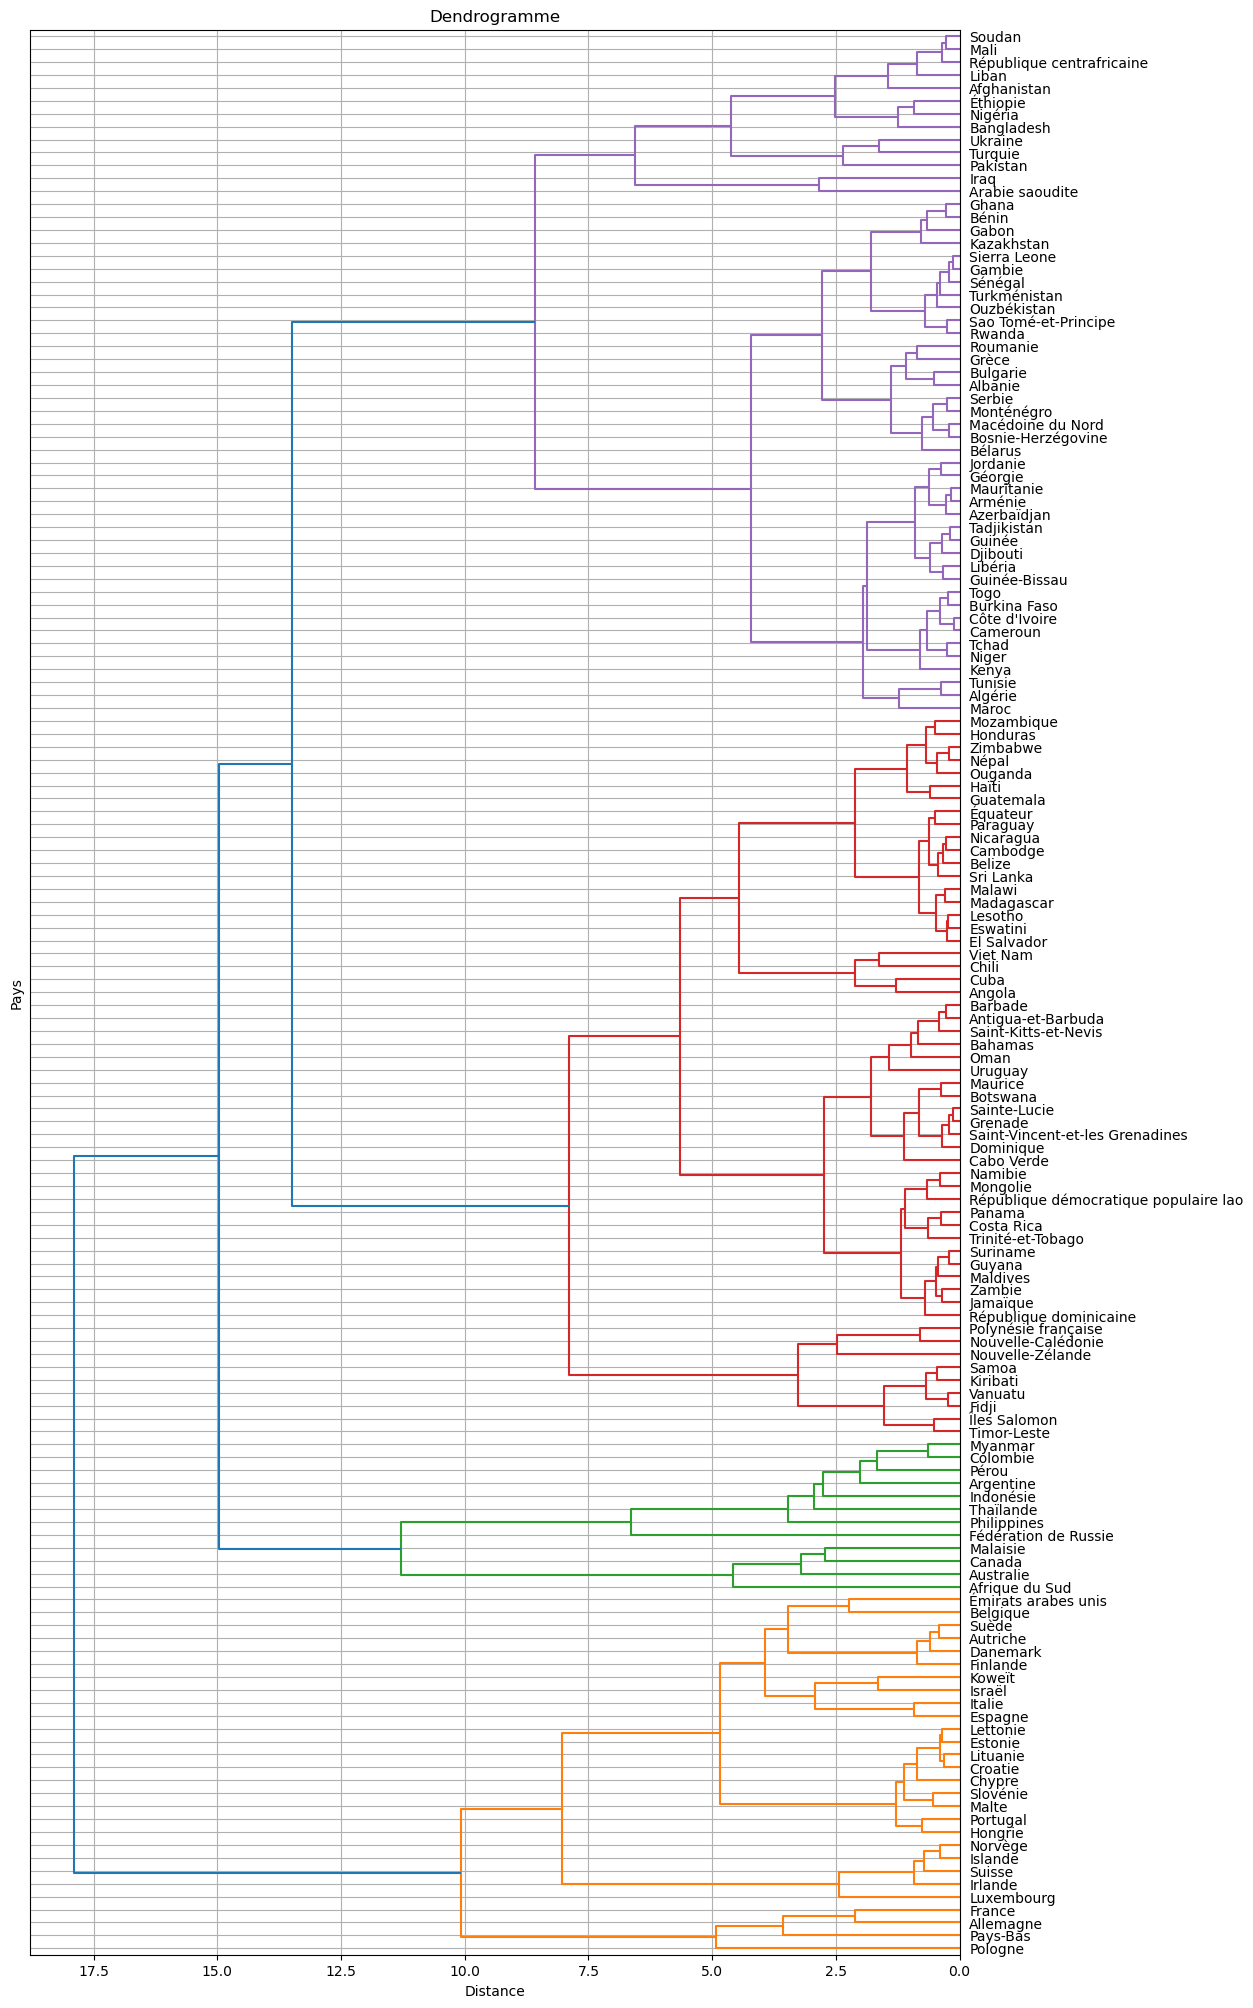

In [42]:
# Clustering hiérarchique (Dendrogramme)
linkage_matrix = linkage(X_pca, method='ward')
plt.figure(figsize=(12, 25))
dendrogram(linkage_matrix, labels=data.index, leaf_rotation=0, leaf_font_size=10,  orientation="left" ) # Orientation horizontale)

plt.title('Dendrogramme')
plt.xlabel('Distance')
plt.ylabel('Pays')
plt.grid(True)
plt.show()


In [43]:
distances = linkage_matrix[:, 2]  # Distances entre les clusters
diffs = np.diff(distances)       # Différences entre distances successives
optimal_threshold = distances[np.argmax(diffs) + 1]  # Seuil basé sur le plus grand saut

print(f'Seuil optimal basé sur le plus grand saut : {optimal_threshold:.2f}')


Seuil optimal basé sur le plus grand saut : 17.90


Choix des clusters:
Distance 12.5 pour avoir 4 clusters

In [44]:
# Sélection des clusters
hierarchical_labels = fcluster(linkage_matrix, t=4, criterion='maxclust')
data['Hierarchical_Cluster'] = hierarchical_labels

# Utiliser .copy() pour éviter l'avertissement
dendro_cluster_table = data[['Hierarchical_Cluster']].copy()
dendro_cluster_table['Pays'] = data.index

# Trier les valeurs par 'Hierarchical_Cluster'
dendro_cluster_table = dendro_cluster_table.sort_values(by='Hierarchical_Cluster')

print("\n--- Clusters hiérarchiques (Tableau) ---\n")
print(dendro_cluster_table.to_string(index=False))




--- Clusters hiérarchiques (Tableau) ---

 Hierarchical_Cluster                                  Pays
                    1                                Suisse
                    1                               Espagne
                    1                               Estonie
                    1                                Chypre
                    1                              Finlande
                    1                                France
                    1                                 Suède
                    1                              Portugal
                    1                               Hongrie
                    1                               Irlande
                    1                               Islande
                    1                                Israël
                    1                                Italie
                    1                               Croatie
                    1                              Slovén

# Étape 8 : Clustering avec K-Means

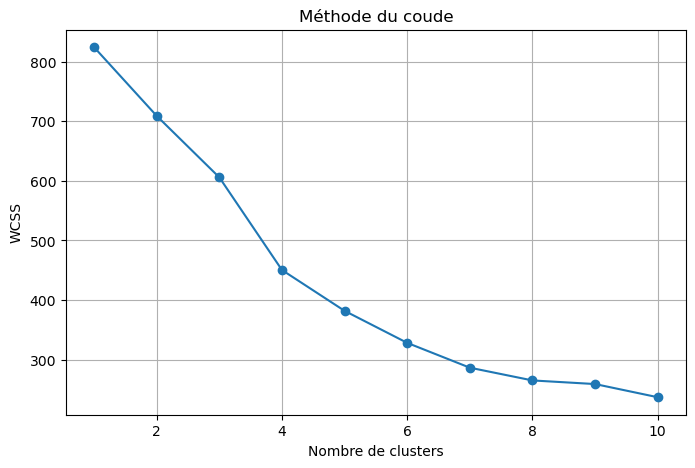

In [46]:
# Méthode du coude pour déterminer le nombre de clusters


wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, n_init="auto", random_state=42)
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-')
plt.title('Méthode du coude')
plt.xlabel('Nombre de clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()




In [47]:
# Déterminer le nombre optimal de clusters en trouvant le "coude"
def find_optimal_number_of_clusters(wcss):
    x1, y1 = 1, wcss[0]
    x2, y2 = len(wcss), wcss[-1]

    distances = []
    for i in range(len(wcss)):
        x0 = i + 1
        y0 = wcss[i]
        numerator = abs((y2 - y1) * x0 - (x2 - x1) * y0 + x2 * y1 - y2 * x1)
        denominator = ((y2 - y1)**2 + (x2 - x1)**2)**0.5
        distances.append(numerator / denominator)

    return distances.index(max(distances)) + 1

optimal_clusters = find_optimal_number_of_clusters(wcss)
print(f"Le nombre optimal de clusters est : {optimal_clusters}")


Le nombre optimal de clusters est : 5


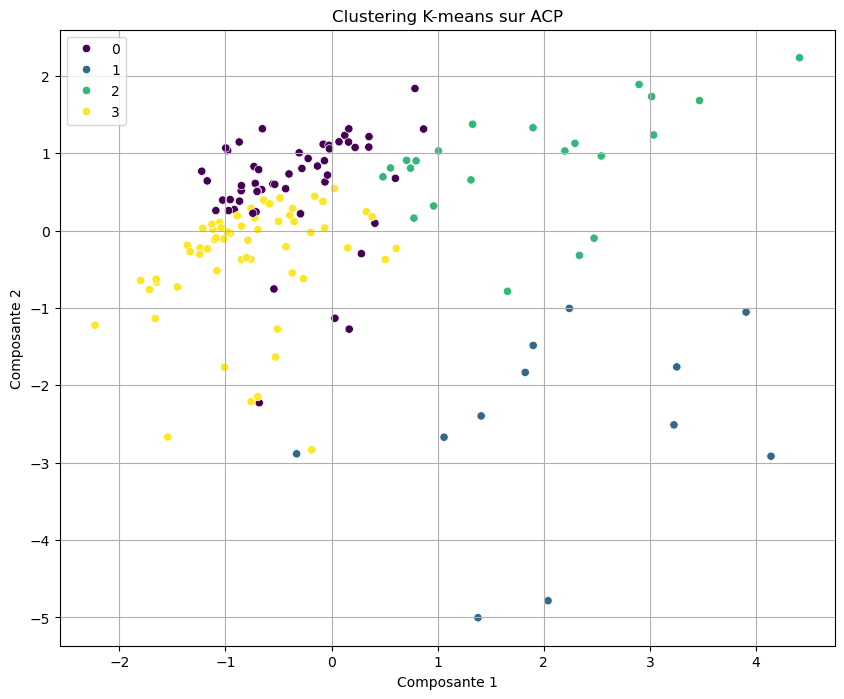

In [48]:
# Choisir le nombre optimal de clusters 4
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_pca)

# Affichage des clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=kmeans_labels, palette='viridis')
plt.title('Clustering K-means sur ACP')
plt.xlabel('Composante 1')
plt.ylabel('Composante 2')
plt.grid(True)
plt.show()


In [49]:
# Affichage des noms des pays par clusters K-means
data['KMeans_Cluster'] = kmeans_labels

# Utiliser .loc pour éviter l'avertissement
kmeans_cluster_table = data[['KMeans_Cluster']].copy()
kmeans_cluster_table['Pays'] = data.index

# Trier les valeurs par 'KMeans_Cluster'
kmeans_cluster_table = kmeans_cluster_table.sort_values(by='KMeans_Cluster')

# Affichage des clusters
for cluster in range(4):
    print(f"Cluster {cluster}:\n")
    countries = data.index[kmeans_labels == cluster].values
    for country in countries:
        print(f" - {country}")
    print("\n")

Cluster 0:

 - Antigua-et-Barbuda
 - Argentine
 - Bahamas
 - Barbade
 - Belize
 - Botswana
 - Cabo Verde
 - Cambodge
 - Chili
 - Costa Rica
 - Cuba
 - Dominique
 - El Salvador
 - Eswatini
 - Fidji
 - Grenade
 - Guyana
 - Indonésie
 - Jamaïque
 - Kiribati
 - Lesotho
 - Madagascar
 - Malawi
 - Maldives
 - Maurice
 - Mongolie
 - Namibie
 - Nicaragua
 - Nouvelle-Calédonie
 - Nouvelle-Zélande
 - Oman
 - Panama
 - Paraguay
 - Polynésie française
 - Pérou
 - Rwanda
 - République dominicaine
 - République démocratique populaire lao
 - Saint-Kitts-et-Nevis
 - Saint-Vincent-et-les Grenadines
 - Sainte-Lucie
 - Samoa
 - Sao Tomé-et-Principe
 - Sri Lanka
 - Suriname
 - Timor-Leste
 - Trinité-et-Tobago
 - Uruguay
 - Vanuatu
 - Viet Nam
 - Zambie
 - Équateur
 - Îles Salomon


Cluster 1:

 - Afrique du Sud
 - Allemagne
 - Arabie saoudite
 - Australie
 - Canada
 - Espagne
 - France
 - Fédération de Russie
 - Malaisie
 - Pays-Bas
 - Philippines
 - Pologne


Cluster 2:

 - Autriche
 - Belgique
 - Chypre

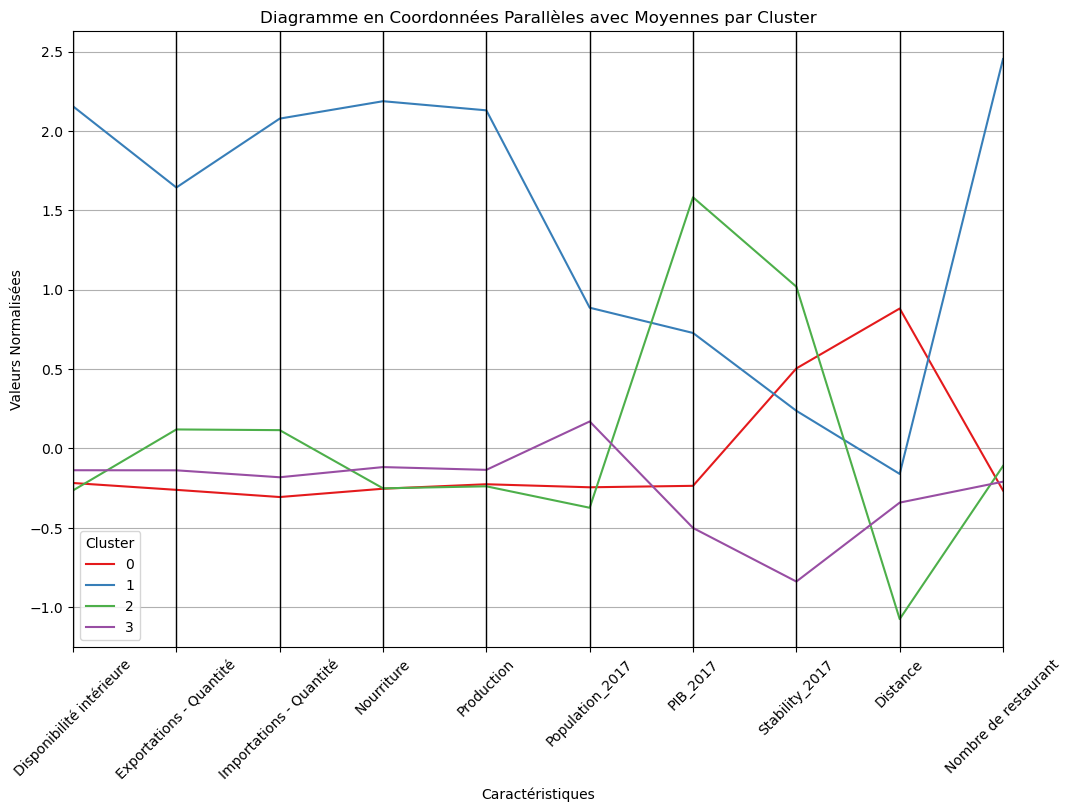

In [50]:
# Diagramme en coordonnées parallèles

df_transforme_scaled['KMeans_Cluster'] = kmeans_labels
# Moyennes par cluster
cluster_means = df_transforme_scaled.groupby('KMeans_Cluster')[features].mean()

# Affichage des moyennes dans un diagramme en coordonnées parallèles
plt.figure(figsize=(12, 8))
parallel_coordinates(cluster_means.reset_index(), class_column='KMeans_Cluster', 
                      cols=features, color=sns.color_palette('Set1', n_colors=4))
plt.title('Diagramme en Coordonnées Parallèles avec Moyennes par Cluster')
plt.xlabel('Caractéristiques')
plt.ylabel('Valeurs Normalisées')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Cluster')
plt.show()


# Étape 9 : Comparaison 

In [52]:
# Score de silhouette pour K-means
silhouette_kmeans = silhouette_score(X_pca, kmeans_labels)
print(f"Coefficient de Silhouette (K-means): {silhouette_kmeans}")

# Score de silhouette pour clustering hiérarchique
silhouette_hierarchical = silhouette_score(X_pca, hierarchical_labels)
print(f"Coefficient de Silhouette (Hiérarchique): {silhouette_hierarchical}")

Coefficient de Silhouette (K-means): 0.2637691663076556
Coefficient de Silhouette (Hiérarchique): 0.2341295527276568


In [53]:
# Davies-Bouldin Index pour K-means
db_kmeans = davies_bouldin_score(X_pca, kmeans_labels)
print(f"Indice de Davies-Bouldin (K-means): {db_kmeans}")

# Davies-Bouldin Index pour clustering hiérarchique
db_hierarchical = davies_bouldin_score(X_pca, hierarchical_labels)
print(f"Indice de Davies-Bouldin (Hiérarchique): {db_hierarchical}")

Indice de Davies-Bouldin (K-means): 1.2891599945261794
Indice de Davies-Bouldin (Hiérarchique): 1.292591305825344


In [54]:
# Calinski-Harabasz Index pour K-means
ch_kmeans = calinski_harabasz_score(X_pca, kmeans_labels)
print(f"Indice de Calinski-Harabasz (K-means): {ch_kmeans}")

# Calinski-Harabasz Index pour clustering hiérarchique
ch_hierarchical = calinski_harabasz_score(X_pca, hierarchical_labels)
print(f"Indice de Calinski-Harabasz (Hiérarchique): {ch_hierarchical}")

Indice de Calinski-Harabasz (K-means): 43.402060611410064
Indice de Calinski-Harabasz (Hiérarchique): 38.07682244227456
